# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

https://github.com/tabsbower/Summative



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [72]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from shiny import App, render, ui

In [63]:
#read data
attendance_df = pd.read_csv('attendance_anonymised-1.csv')

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [64]:
# display first five rows of the dataframe
attendance_df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


In [45]:
#use info() to display a summary of the dataframe
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

In [65]:
#use describe() to display statistical summary of the dataframe
attendance_df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


3. Drop the `Planned End Date` column.


In [66]:
#drop planned end date column and display first 5 rows of dataframe to verify
attendance_df_new = attendance_df.drop("Planned End Date", axis=1)
attendance_df_new.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [67]:
# rename the columns
attendance_df_new.rename(columns={"Unit Instance Code": "Module Code", 
                                  "Calocc Code": "Year", 
                                  "Long Description": "Module Name", 
                                  "Register Event ID": "Event ID" ,
                                  "Register Event Slot ID": "Event Slot ID" ,
                                  "Planned Start Date": "Date" ,
                                  "is Positive": "Has Attended" ,
                                  "Postive Marks": "Attended" ,
                                  "Negative Marks": "NotAttended" ,
                                  "Usage Code": "Attendance Code"}, 
                                  inplace=True)

#display first 5 rows to verify changes
attendance_df_new.head()

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [68]:
#convert 'Date' column to datetime format
attendance_df_new['Date'] = pd.to_datetime(attendance_df_new['Date'])

#verify changes
attendance_df_new.dtypes

Person Code                 int64
Module Code                 int64
Year                        int64
Surname                    object
Forename                   object
Module Name                object
Event ID                    int64
Object ID                   int64
Event Slot ID               int64
Date               datetime64[ns]
Has Attended               object
Attended                    int64
NotAttended                 int64
Attendance Code            object
dtype: object

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



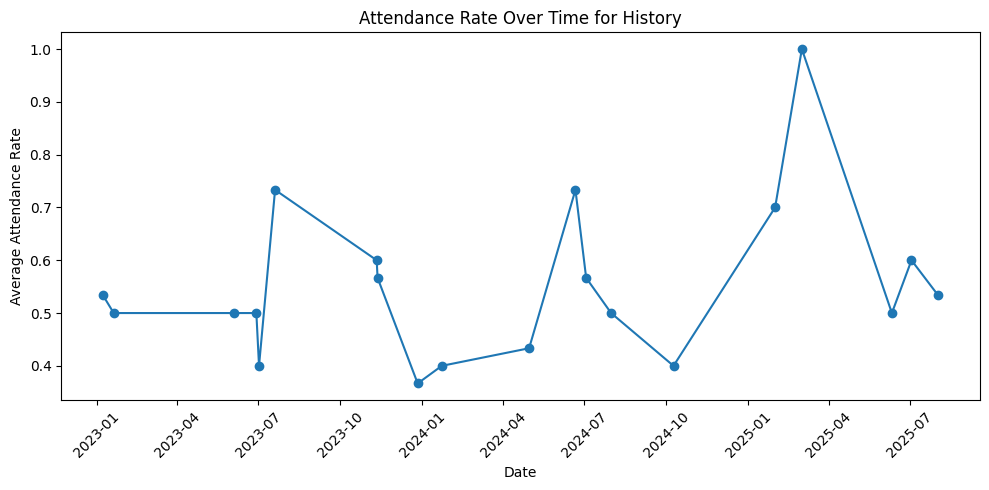

In [69]:
#choose module and filter dataframe for it
module = 'History'
module_df = attendance_df_new[attendance_df_new['Module Name'] == module]

#group by date and calculate attendance rate
attendance_rate = module_df.groupby('Date')['Attended'].mean().reset_index()

#plot attendance rate over time 
plt.figure(figsize=(10,5))
plt.plot(attendance_rate['Date'], attendance_rate['Attended'], marker='o')
plt.title(f'Attendance Rate Over Time for {module}')
plt.xlabel('Date')
plt.ylabel('Average Attendance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [70]:
#calculate average student attendance
average_attendance = attendance_df_new.groupby('Person Code')['Attended'].mean()

#add to dataframe
attendance_df_new['Student Overall Attendance'] = attendance_df_new['Person Code'].map(average_attendance)

#add z-scores column
attendance_df_new['Standardised Student Attendance'] = stats.zscore(attendance_df_new['Student Overall Attendance'])

#display first 5 rows to verify
attendance_df_new.head()

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.777522
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.777522
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.454770
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.216216,-2.454770
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.216216,-2.454770


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

In [75]:
#define UI
app_ui = ui.page_fluid(
    ui.h2("Attendance Rate Over Time"),
    ui.output_plot("attendance_plot"))

#define server
def server(input, output, session):
    @render.plot
    def attendance_plot():
        plt.figure(figsize=(10, 5))
        plt.plot(attendance_rate.index, attendance_rate.values, marker='o')
        plt.title(f'Attendance Rate Over Time for {module}')
        plt.xlabel('Date')
        plt.ylabel('Average Attendance Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        return plt.gcf()
    
#create app
app = App(app_ui, server)


### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [9]:
# your code here
...

2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


In [10]:
# your code here
...

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    [Double click on this cell to edit and type your answer]

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [11]:
# your code here
...

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!